## Customer Churn Analysis
Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading dataset
pd.set_option('display.max_columns',None)
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Obs: The dataset has 1 float variable, 2 int variables , and 18 object variables. total charges should be float datatype but its shows as object, we need to inspect and correct it.

In [7]:
# converting object column into float datatype
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

# Checking Nulls

In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### Obs: totalcharges column has 11 null values.

# Statistical Summary

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


#### Obs: 
1-Total Charges is right skewed and it conatain outliers because the difference between 3rd quantile and max values is very high.

2-Monthly charges is little left skewed because mean is greater than median here.

In [10]:
# imputing null values 
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())

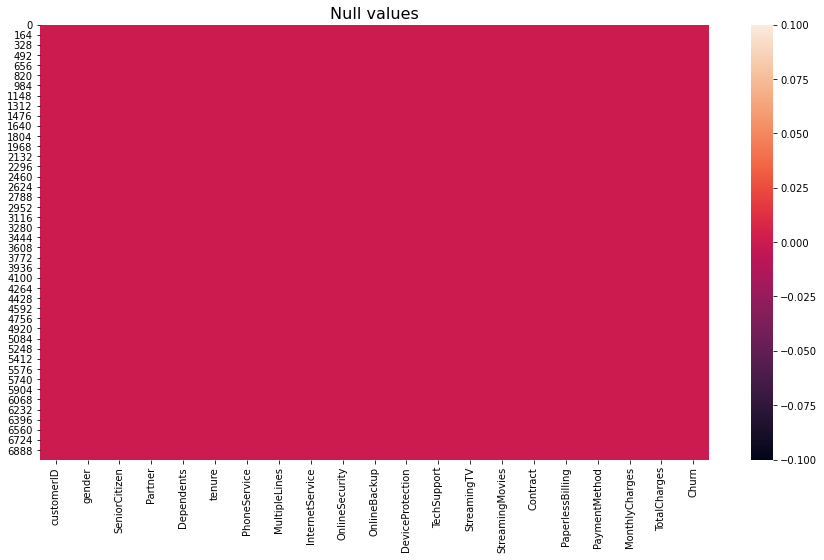

In [11]:
# once again checking null values
plt.figure(figsize=(15,8))
plt.title('Null values',fontsize=16)
sns.heatmap(df.isnull());

# Univariate Analysis

Minimum 0
Maximum 72


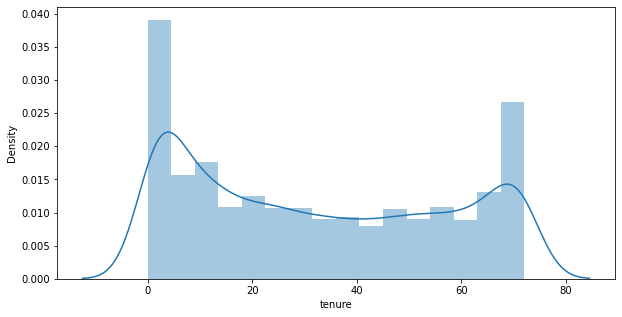

In [12]:
plt.figure(figsize=(10,5))
sns.distplot(df['tenure'])
print('Minimum',df['tenure'].min())
print('Maximum',df['tenure'].max())

The minimum Tenure is 1 and maximum tenure is 72. And the data is little deviated.

Minimum 18.8
Maximum 8684.8


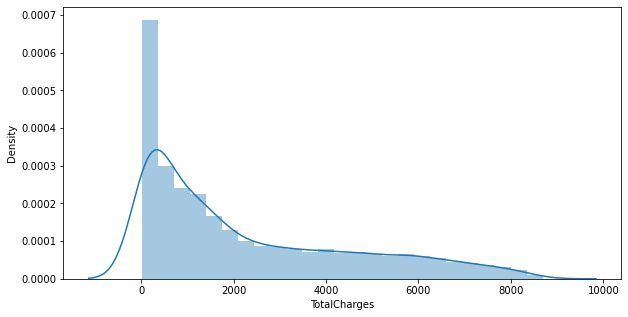

In [13]:
plt.figure(figsize=(10,5))
sns.distplot(df['TotalCharges'])
print('Minimum',df['TotalCharges'].min())
print('Maximum',df['TotalCharges'].max())

The minimum TotalCharges is 18.8 that is close to minimum of monthly charges, that means people might be stop using the service after one month onwards and maximum value is 8684.8.

The value of the feature is deviated.

Minimum 18.25
Maximum 118.75


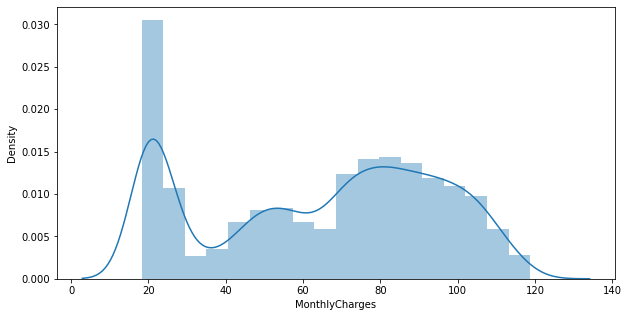

In [14]:
plt.figure(figsize=(10,5))
sns.distplot(df['MonthlyCharges'])
print('Minimum',df['MonthlyCharges'].min())
print('Maximum',df['MonthlyCharges'].max())

#### Minimum monthly charge is 18.25 and maximum value is 118.75. As we can see, the feature is bit deviated.

# target variable( Churn )

No     5174
Yes    1869
Name: Churn, dtype: int64

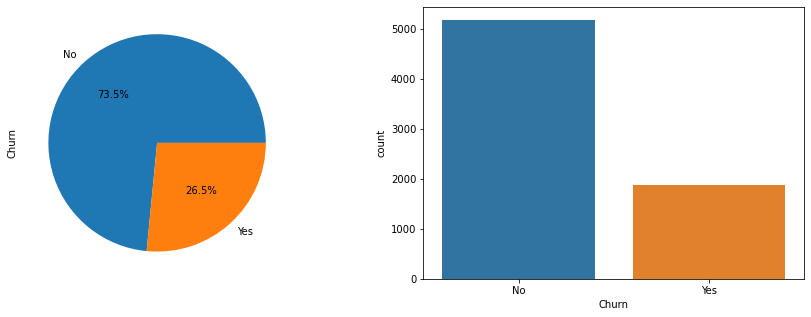

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%')   
plt.subplot(1,2,2)
sns.countplot(df['Churn'])
df['Churn'].value_counts()

As we can see, the count of active customer is more than inactive customer. Like, Active Customer count is 5163 (73.4%) and inactive customer count is 1869 (26.6%).

In [17]:
def pier(df,col):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    df[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.subplot(1,2,2)
    sns.countplot(df[col],hue='Churn',data=df)
    print(df[col].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64


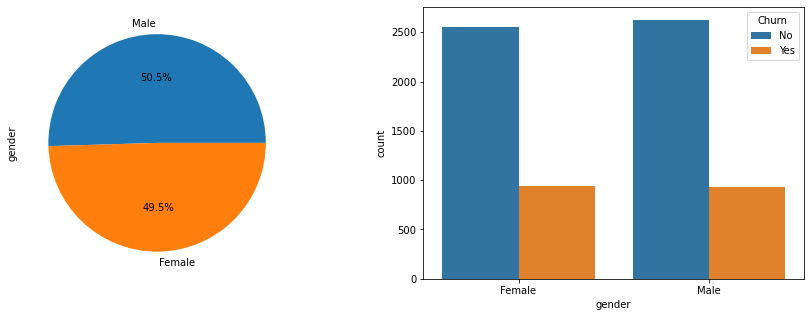

In [18]:
pier(df,'gender')

there is approximatly similar ratio for churners and non churners

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


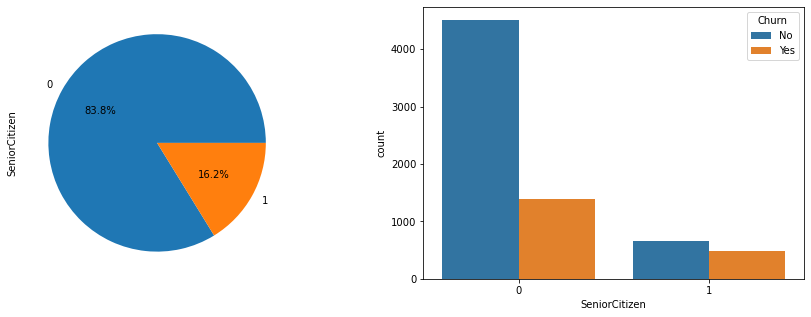

In [19]:
pier(df,'SeniorCitizen')

the basis of ratio we can see that senior citizens are more churners then other age group

No     3641
Yes    3402
Name: Partner, dtype: int64


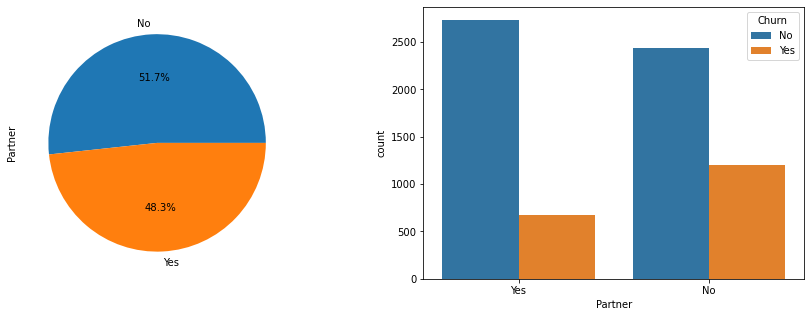

In [20]:
pier(df,'Partner')

Single people are more likly to switch to different network as compared to people who are married/non single.

No     4933
Yes    2110
Name: Dependents, dtype: int64


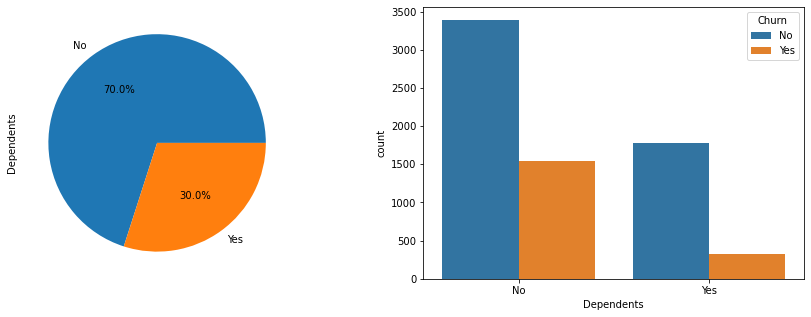

In [21]:
pier(df,'Dependents')

People who has no dependents seems more to switch to different network.

Yes    6361
No      682
Name: PhoneService, dtype: int64


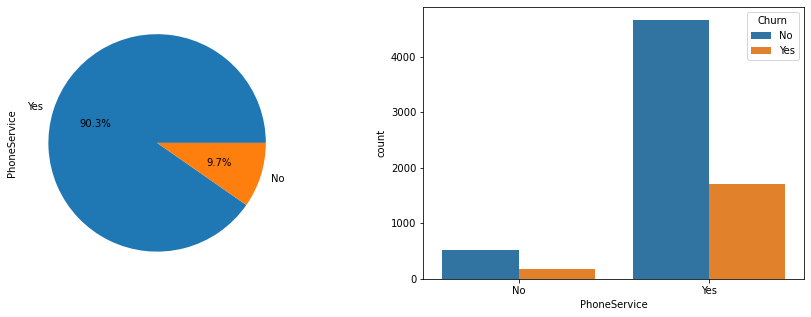

In [22]:
pier(df,'PhoneService')

People who are using Elctronic Check for payment method usually churn more than people using credit card/bank transfer/mailed check

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


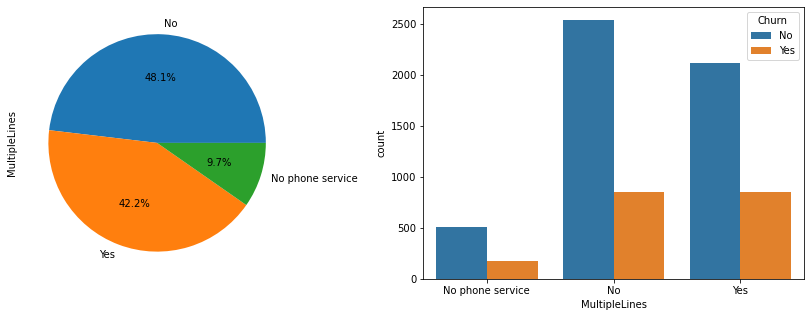

In [23]:
pier(df,'MultipleLines')

Here we can find a surprising fact that people who are new to network and fall under tenure group of 1-12 months have highest chances to churn wheras people who are using network for a very long time they are more loyal to company and has lowest chances to churn from network.

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


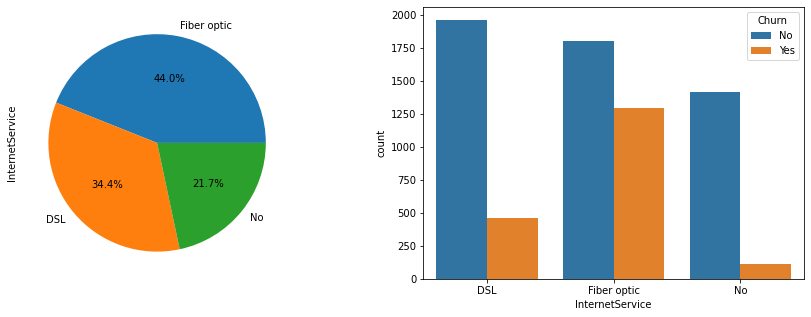

In [24]:
pier(df,'InternetService')

Another surprising fact we can see that people who avail a month to month contract has the highest chances to churn where as people who has contract for year/two year has least chances to churn.

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


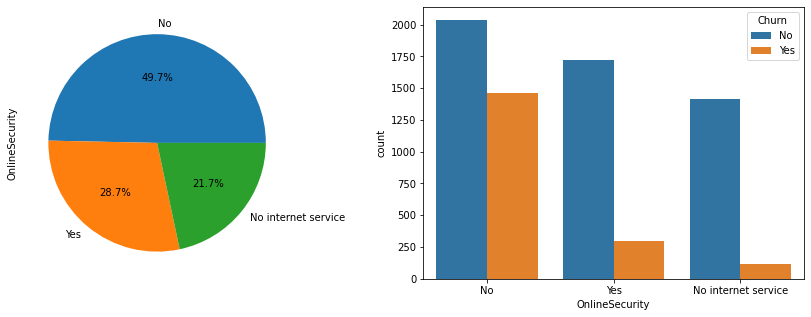

In [25]:
pier(df,'OnlineSecurity')

The count of customers without online security is highest 3498 (49.7%) and the count of customers with online security is 2nd highest 2019 (28.7%) and rest of the customers are without internet service 1526 (21.6%).

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


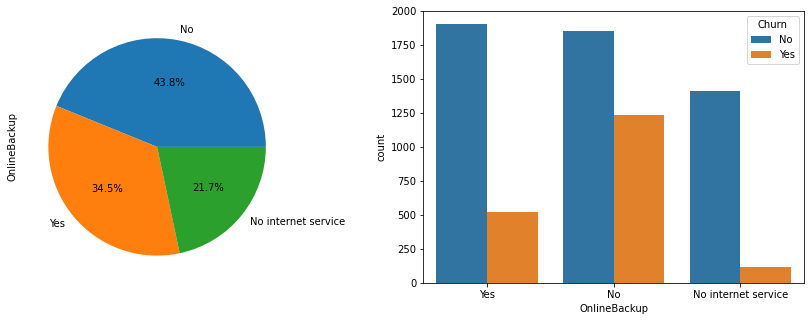

In [26]:
pier(df,'OnlineBackup')

People who has no online backup support churn more. People who has no internet services generally churn least.

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


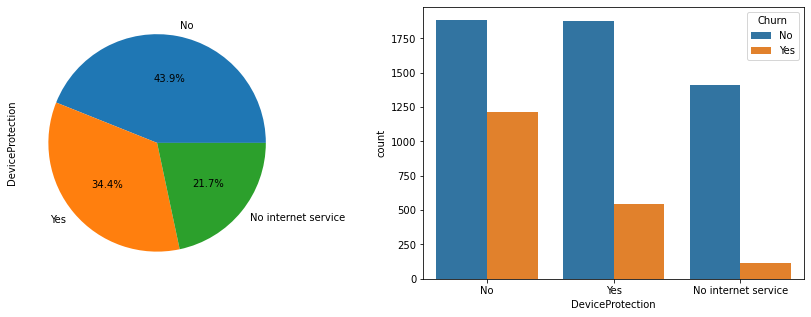

In [27]:
pier(df,'DeviceProtection')

People who are using online mode for billing and get the billing paper online/mail/pdf are generally churners.

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


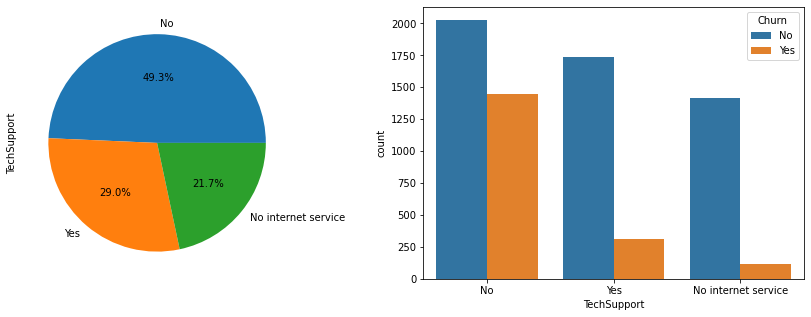

In [28]:
pier(df,'TechSupport')

The count of customers without Tech Support is highest 3473 (49.3%) and the count of customers with Tech Support is 2nd highest 2044 (29.0%) and rest of the customers are without internet service 1526 (21.7%).

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


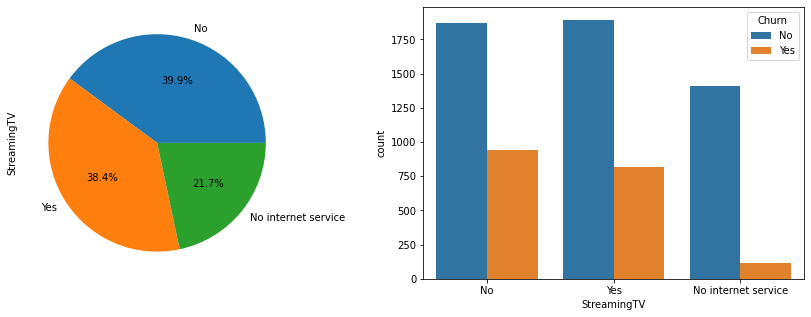

In [29]:
pier(df,'StreamingTV')

The count of customers without Streaming TV is highest 2810 (39.9%) and the count of customers with Streaming TV is 2nd highest 2707 (38.4%) and rest of the customers are without internet service 1526 (21.7%).

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


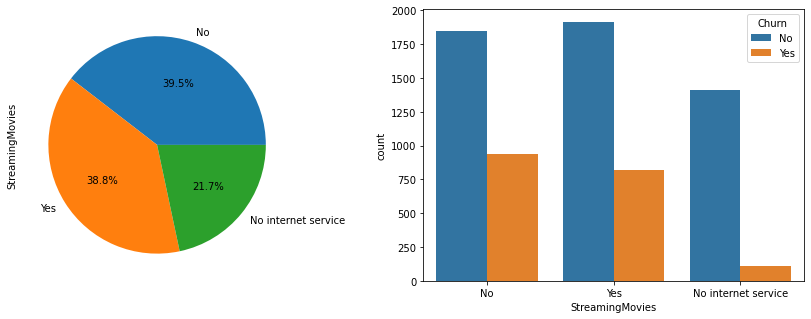

In [30]:
pier(df,'StreamingMovies')

The count of customers without Streaming movies is highest 2785 (39.5%) and the count of customers with Streaming TV is 2nd highest 2732 (38.8%) and rest of the customers are without internet service 1526 (21.6%).

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


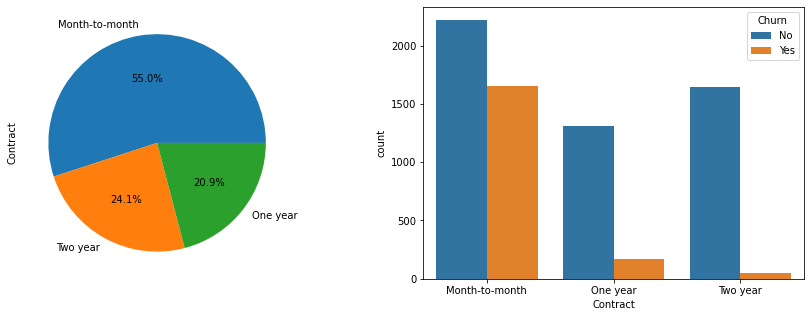

In [31]:
pier(df,'Contract')

The count of customers with month to month Contract is highest 3875 (55.0%) and the count of customers with two year contract is 2nd highest 1695 (24.1%) and rest of the customers are like to have one year Contract 1473 (20.9%)

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


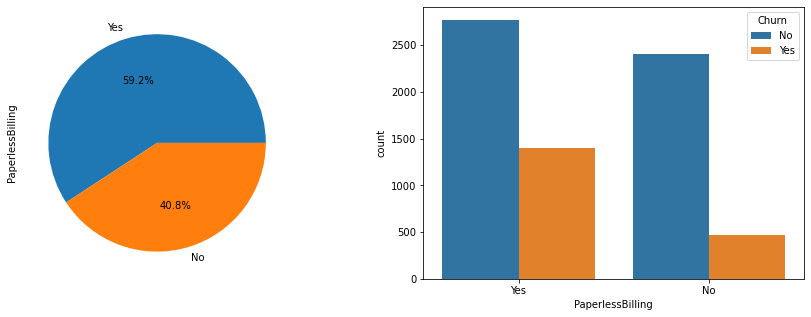

In [32]:
pier(df,'PaperlessBilling')

The count of Customers who prefer paperless billing is 4171 (59.2%) and who do not prefer paperless billing is 2872 (40.8%)

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


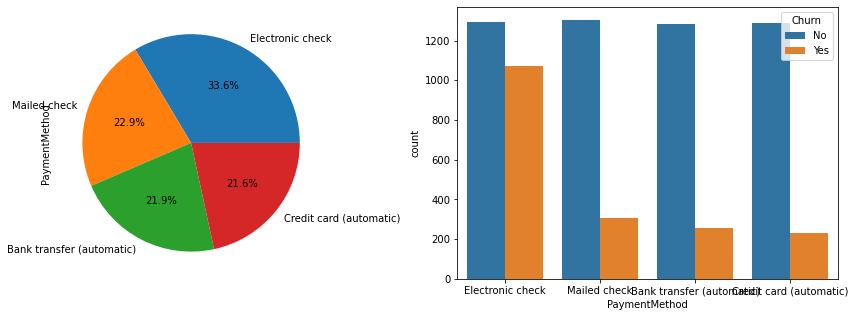

In [33]:
pier(df,'PaymentMethod')

Customers are more into Electronic Check ( 2365 ) regarding Payment method and using of Credit card (automatic) is least(1522) regarding payment.

# Outliers

In [34]:
con_features=df[['tenure','MonthlyCharges','TotalCharges']]   # instantiating continuous features into a single variable

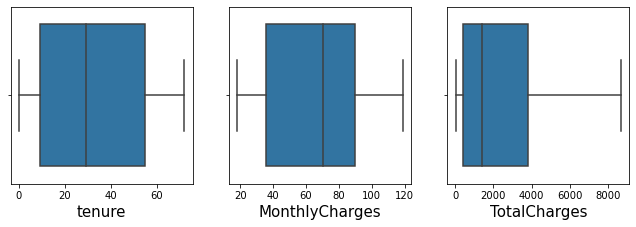

In [35]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for column in con_features:
    if plotnumber<=3:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(con_features[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show();

#### Obs: No outliers in these continuous features.

# Skewness

In [36]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963789
dtype: float64

# Bivariate Analysis:

In [37]:
#let's divide the target variable churn and features
y = df['Churn']
x = df.drop(columns=['Churn'])
x

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


# Checking the relations between Churn with continuous features first.

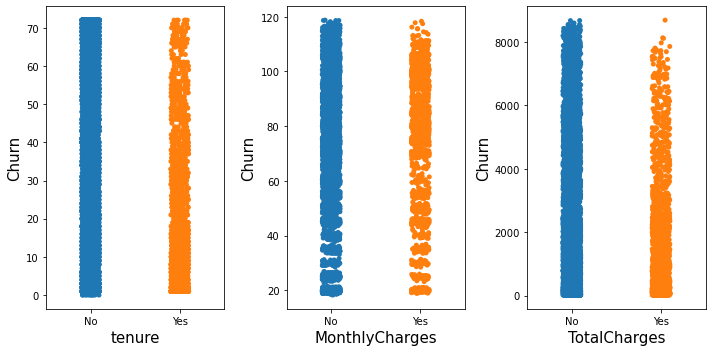

In [38]:
plt.figure(figsize=(10,5),facecolor='white')
plotnumber=1
for column in con_features:
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)
        sns.stripplot(y,con_features[column])
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Churn',fontsize=15)
    plotnumber+=1
plt.tight_layout();

Long duration of tenure is good for active customers. More long the tenure is more customer is actively using telecom.

More monthly charge,there is a possibility to become inactive customer.

Total charges is the accumulation of all charges. More total charges more active customers.

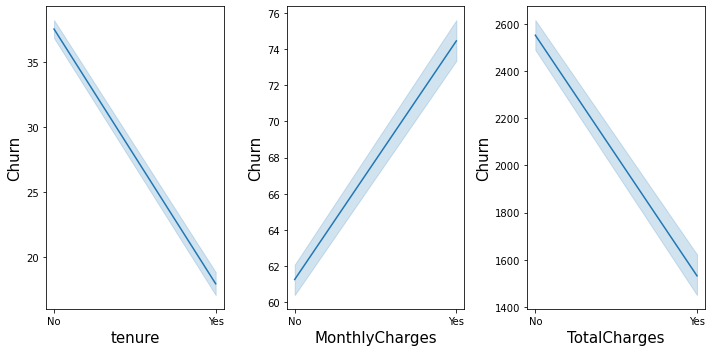

In [39]:
plt.figure(figsize=(10,5),facecolor='white')
plotnumber=1
for column in con_features:
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)
        sns.lineplot(y,con_features[column])
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Churn',fontsize=15)
    plotnumber+=1
plt.tight_layout();

More the tenure is more likly to get active customers.

More the monthly charge is more likely to get inactive customers.

As total charges is the addition of all charges so, more the active customers more the Total charges


#### encoding the target before checking the relations between target and categorical variables:

In [40]:
# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [41]:
l = LabelEncoder()
l_s = ['Churn']
for i in l_s:
    df[i] = l.fit_transform(df[i])

the target variable 'Churn' is encoded into 0 and 1. ( 0 = Active Customer, 1 = Inactive Customer )

# checking the relations.

In [42]:
def uni(df,col):
    plt.figure(figsize=(12,8))
    plt.title(col+ ' Vs Churn',fontsize=18)
    sns.countplot(df[col],hue='Churn',data=df)

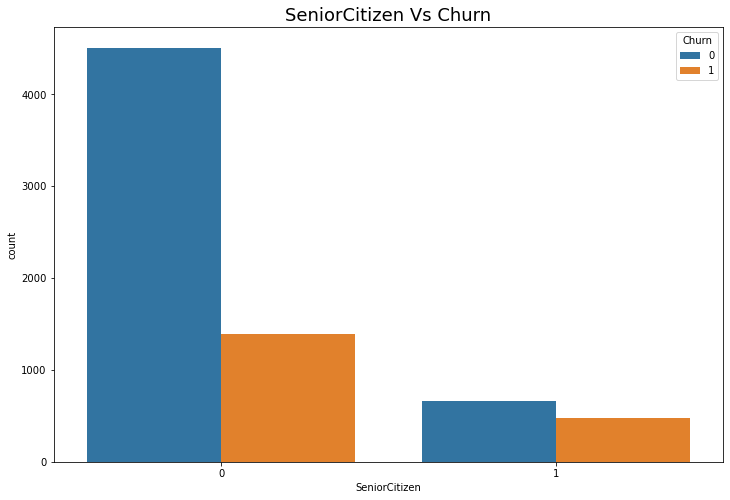

In [43]:
uni(df,'SeniorCitizen')

Most of the Senior citizen are the active customers.

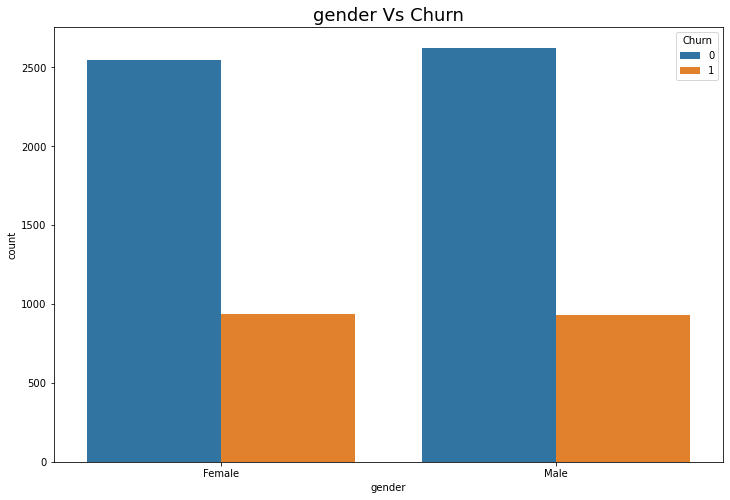

In [44]:
uni(df,'gender')

Both in male and female categories there are more active customers than inactive customers.

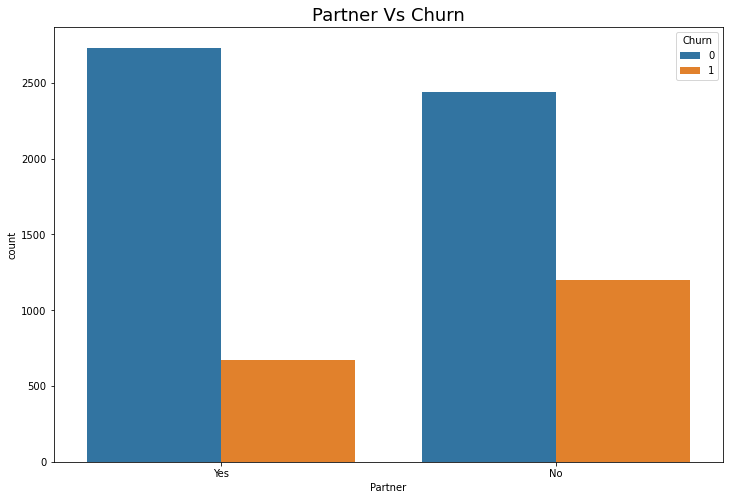

In [45]:
uni(df,'Partner')

Customers with partners are more likely to be active than customers without partners.

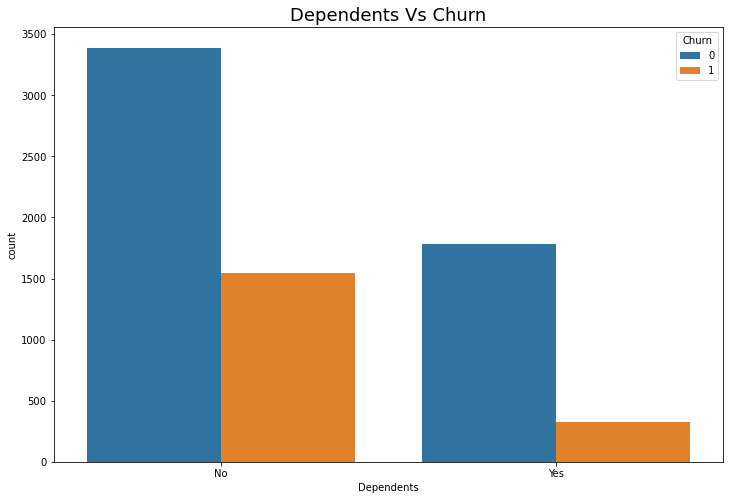

In [46]:
uni(df,'Dependents')

Customers without dependents are more likely to be active than customers with dependents. Inactive customers without dependents are also there and the count is good.

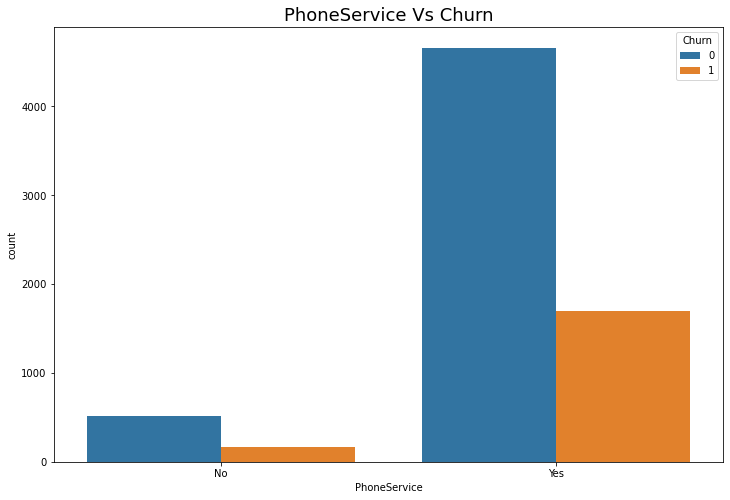

In [47]:
uni(df,'PhoneService')

Customers with Phone Service is more and active than customers without Phone service.

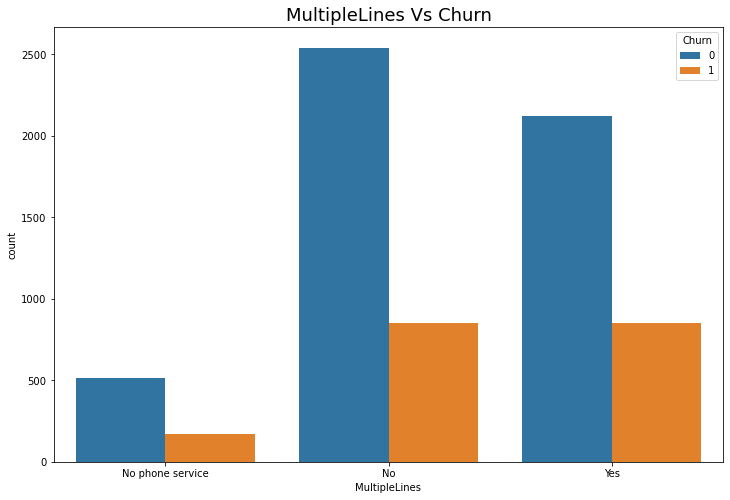

In [48]:
uni(df,'MultipleLines')

Customers without Multiple lines are more active than customers with Multiple lines and Customers with no phone service.

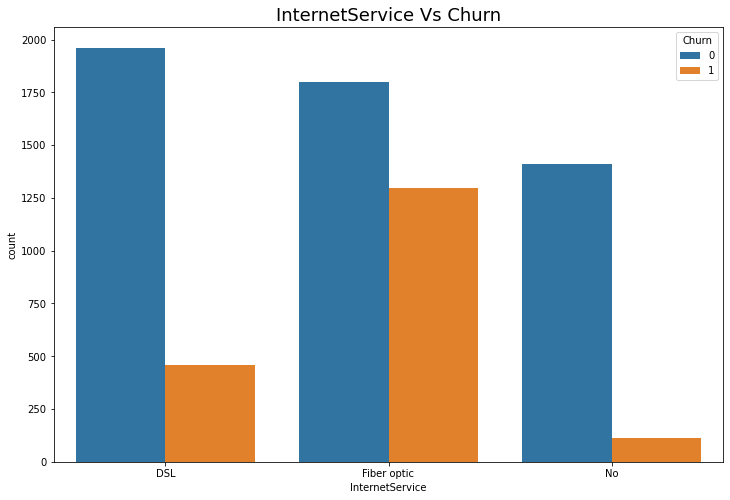

In [49]:
uni(df,'InternetService')

Active customers are more likely to use DSL Internet service, than customers with Fiber Optic Internet service.

The count of inactive customers of Fiber optic internet service is huge.

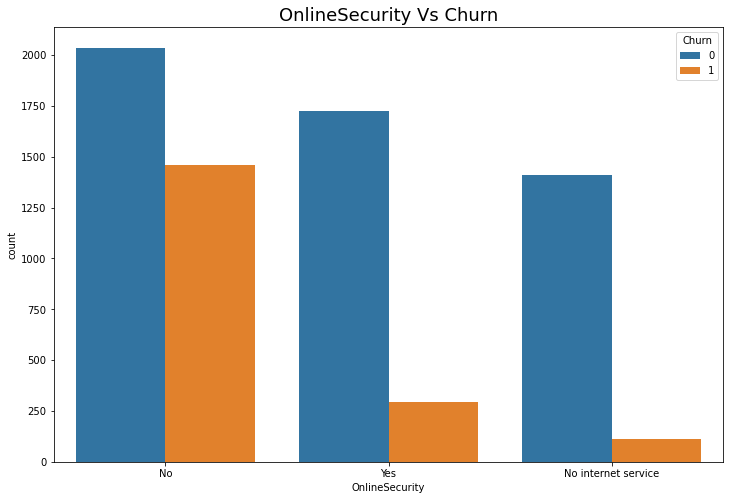

In [50]:
uni(df,'OnlineSecurity')

The Count of active customers without online security is highest and the count of inactive customers of the same category is also huge.

Whereas the count of inactive customers with online security is very less regarding active customers of the category

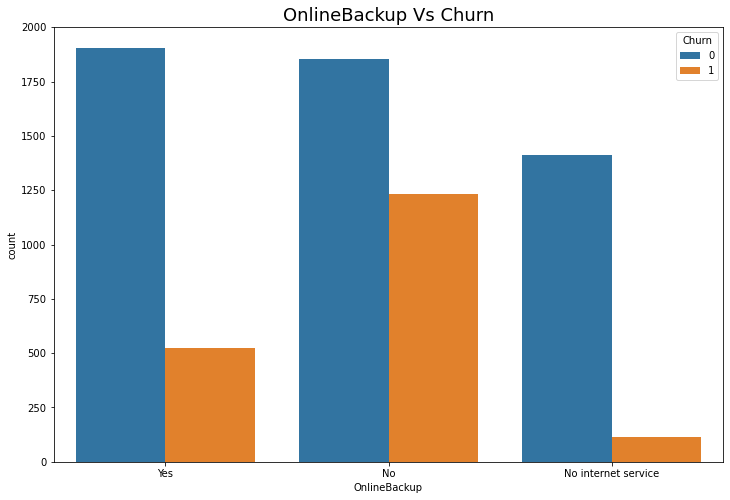

In [51]:
uni(df,'OnlineBackup')

The Count of active customers with online backup and the Count of active customers without online backup is almost same and highest.

Whereas the count of inactive customers without online backup is huge regarding active customers of the category.

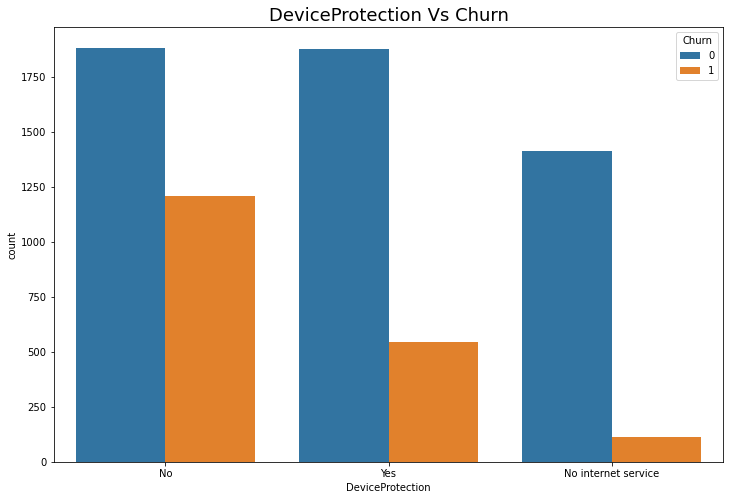

In [52]:
uni(df,'DeviceProtection')

The Count of active customers with Device protection and the Count of active customers without device protection is almost same and highest.

Whereas the count of inactive customers without device protection is huge regarding active customers of that category.

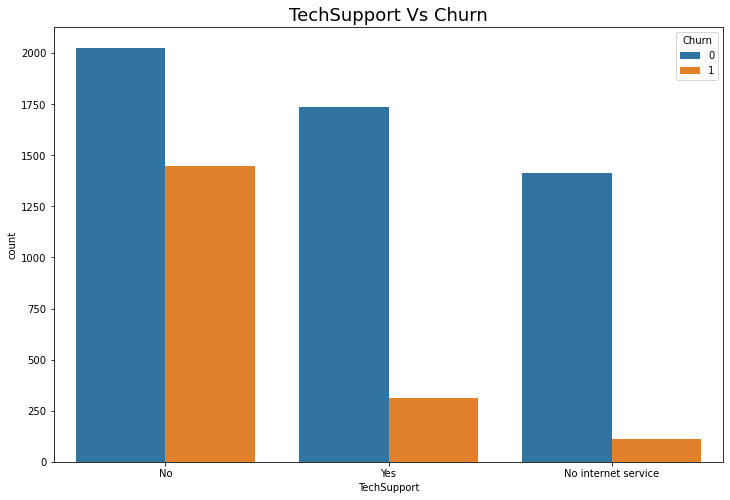

In [53]:
uni(df,'TechSupport')

The Count of active customers without Tech Support is highest than customers with tech support.

Whereas the count of inactive customers without Tech support is huge regarding active customers of the category.

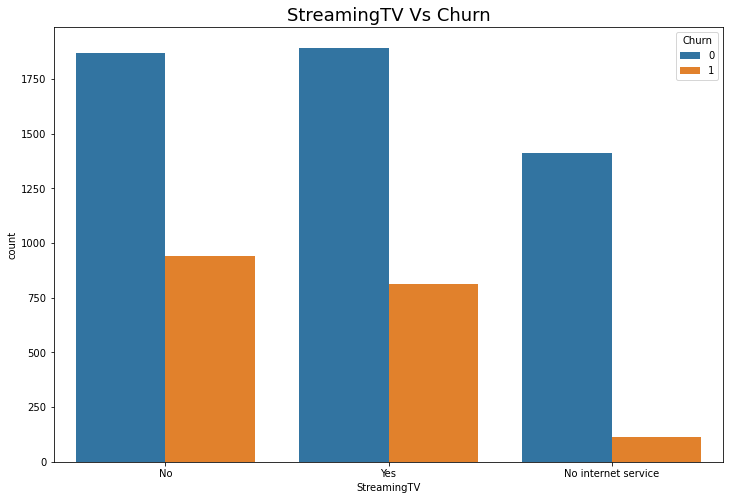

In [54]:
uni(df,'StreamingTV')

The Count of active customers with Streaming Tv and the Count of active customers without Streaming Tv is almost same and highest.

Whereas the count of inactive customers without Streaming Tv is more than the inactive customers with Streaming tv service.

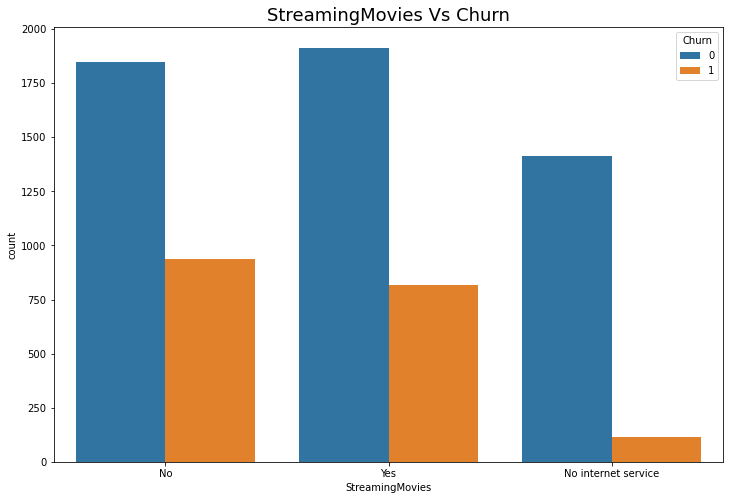

In [55]:
uni(df,'StreamingMovies')

The Count of active customers with Streaming movies and the Count of active customers without Streaming movies is almost same and highest.

Whereas the count of inactive customers without Streaming movies is more than the inactive customers with Streaming movies service.

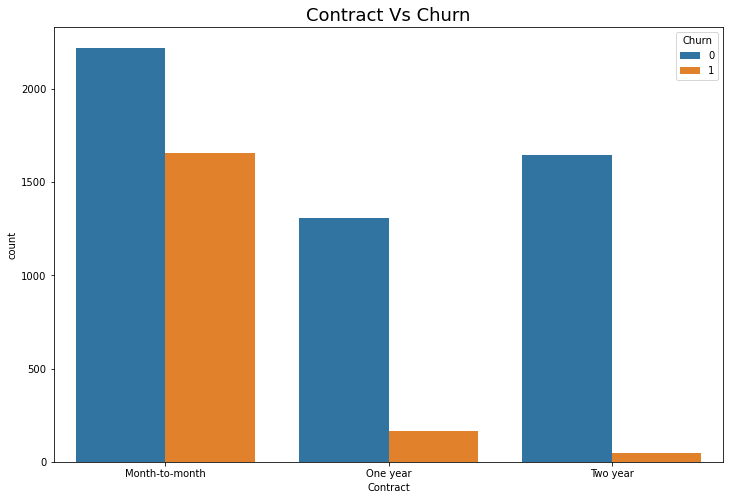

In [56]:
uni(df,'Contract')

Though active customers with month to month contract is highest but the inactive customers are also in huge numbers.

Whereas active customers with 2 years contract and one year contract is a bit less but the inactive number of customers is significantly less.

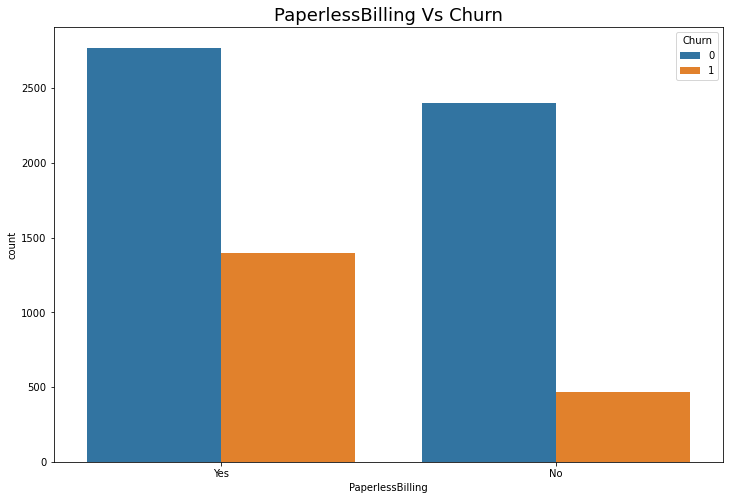

In [57]:
uni(df,'PaperlessBilling')

The count of active customers who use paperless billing is more than count of active customers who do not use paperless billing.

The count of inactive customers who use paperless billing are also big.

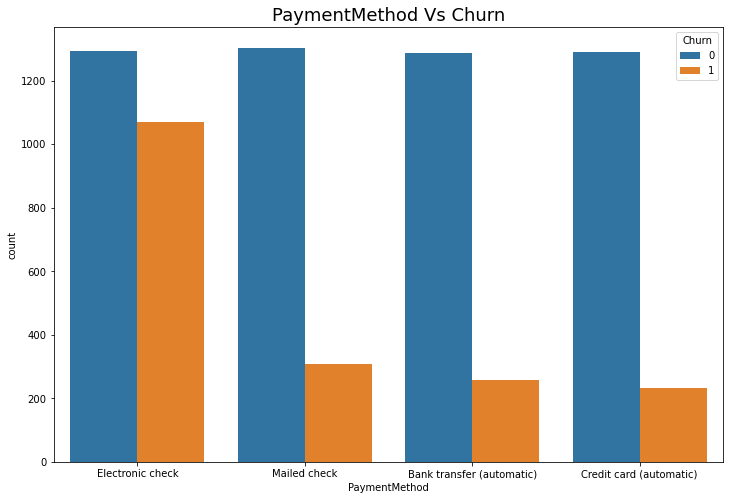

In [58]:
uni(df,'PaymentMethod')

Active customers use all the payment methods whereas count of inactive customers are highest in Electronic check method.

<Figure size 576x360 with 0 Axes>

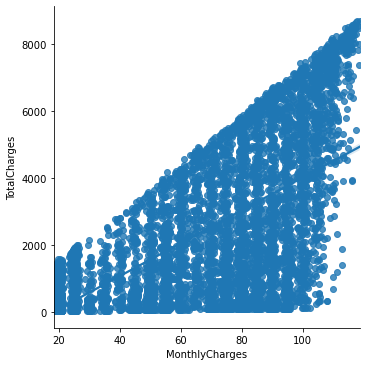

In [59]:
plt.figure(figsize=(8,5))
sns.lmplot(x='MonthlyCharges',y='TotalCharges',data=df)
plt.show();

As we can see, more the monthly charge more the total charge.

# Multivariate Analysis

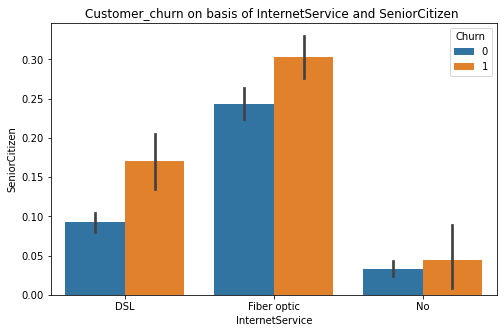

In [60]:
plt.figure(figsize=(8,5))
sns.barplot(x='InternetService',y='SeniorCitizen',hue='Churn',data=df).set_title('Customer_churn on basis of InternetService and SeniorCitizen ')
plt.show()

Inactive customers of Fiber optic internet service is highest than DSL internet service. In both cases inactive customers are more in count than active customers.

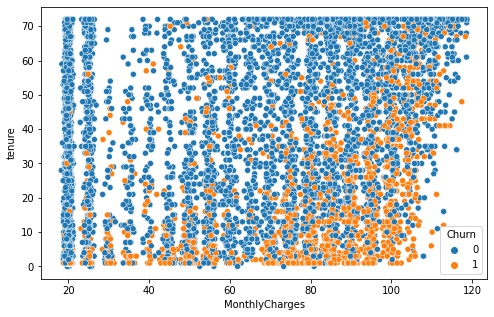

In [61]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='MonthlyCharges',y='tenure',hue='Churn',data=df)
plt.show();

If tenure is less and monthly charge is more then there is more possibility to get inactive.

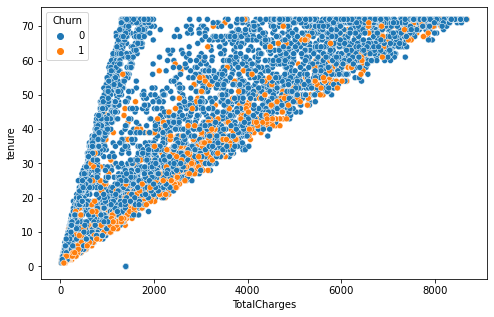

In [62]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='TotalCharges',y='tenure',hue='Churn',data=df)
plt.show()

If tenure is more then Total charges is also more. Customers tend to get inactive in case of more total charge with less tenure coverage.

# Correlation

In [63]:
corr=df.corr() #checking the shape first
corr.shape

(5, 5)

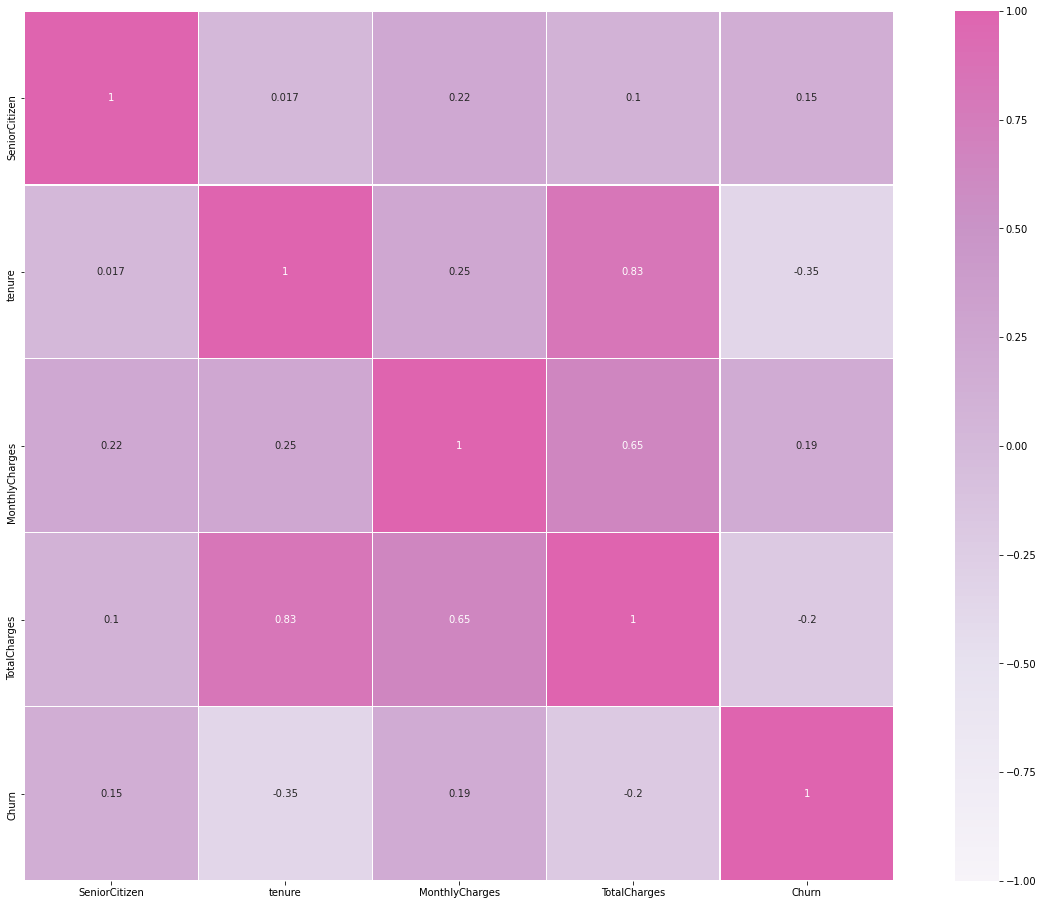

In [64]:
#Checking correlation matrix(heatmap) to understand the feature vs feature relationship.

plt.figure(figsize=(22,16))
sns.heatmap(corr,cbar=True,cmap='PuRd',vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,annot_kws={'size':10},linewidths=.1,linecolor='white')
plt.show();

As we can see there is a correlation between tenure and total charges.

There is little correlation between monthly charge and total charges.

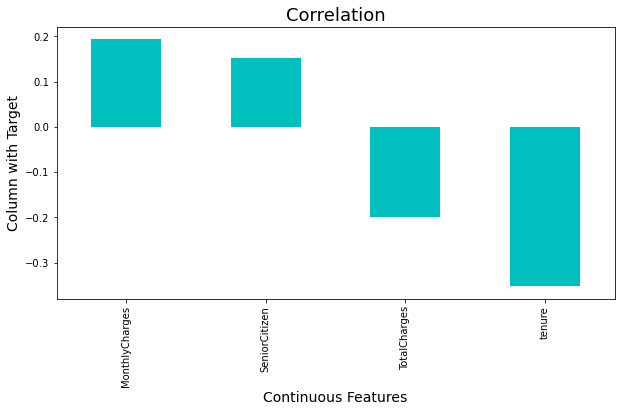

In [65]:
plt.figure(figsize=(10,5))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('Continuous Features',fontsize=14)
plt.ylabel('Column with Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show();

Monthly Charges and Senior citizen features are positively related with target variable.

Total charges and Tenure are negatively related with target variable.

# Feature engineering:

The independent variable tenure is containing months as tenure. The range is from 1 to 72 months. For more simplicity we are going to combine those months into different groups. Let's do it:

In [66]:
print(df['tenure'].max())   # 72 is the maximum duration as tenure

72


In [67]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]  #12 months is the step size

df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

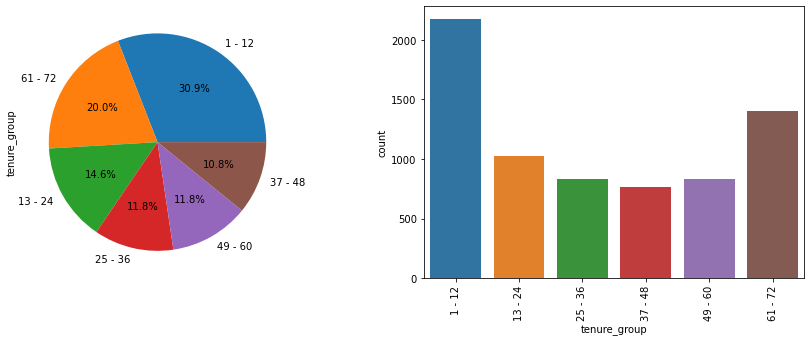

In [68]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['tenure_group'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['tenure_group'])
plt.xticks(rotation=90)
df['tenure_group'].value_counts()

As we can see, there are diiferent groups of tenure where each group is having 12 months of duration.

Customers are more likely in tenure 1-12 group than other groups.

In [69]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


Customer Id column is not required for model creation as it contains unique numbers only

As tenure group is there hence no need to have separate tenure column

In [70]:
drop_column=['customerID','tenure']  # Dropping  unnecessary columns
df=df.drop(columns=drop_column,axis=1)

# Encoding:

We are going to encode the nominal column by using get_dummies encoder from pandas.

In [71]:
df1 = pd.get_dummies(df)
df1.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


#### check the correlation once again:

In [72]:
corr=df1.corr()
corr.shape

(51, 51)

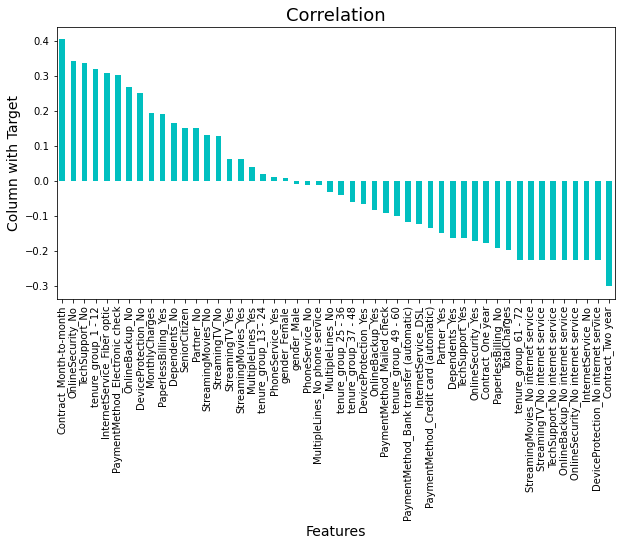

In [73]:
plt.figure(figsize=(10,5))
df1.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Column with Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show();

# Data Cleaning and outlier Removal

In [74]:
df.skew()

SeniorCitizen     1.833633
MonthlyCharges   -0.220524
TotalCharges      0.963789
Churn             1.063031
dtype: float64

In [75]:
# We are taking all the skewness of continuous feature into single variable
features=['TotalCharges']
scaler=PowerTransformer(method='yeo-johnson')  #using yeo-johnson method
df[features]=scaler.fit_transform(df[features].values) #scaling the feature
df[features]

,TotalCharges
0,-1.811104
1,0.254277
2,-1.387090
3,0.233221
4,-1.249770
...,...
7038,0.296643
7039,1.567315
7040,-0.859191
7041,-0.922307


#### dividing the dataset into target and features for model creation.

In [76]:
y=df1['Churn']
x=df1.drop(columns=['Churn'])

# Feature Importance

[0.02646289 0.12167715 0.14454594 0.02187654 0.0216622  0.01811514
 0.01831171 0.01519359 0.01441087 0.0029652  0.00305402 0.01510598
 0.00323524 0.01505242 0.01207153 0.03459982 0.00140704 0.03613375
 0.00232432 0.01053121 0.01931368 0.00193269 0.01483462 0.01874131
 0.00271745 0.01458644 0.02600637 0.00228239 0.01221792 0.01412908
 0.0003563  0.0143335  0.01448309 0.00184762 0.01433881 0.05684406
 0.01069558 0.01766064 0.01660431 0.0165683  0.01517676 0.01542877
 0.02932153 0.01306479 0.04414675 0.01189642 0.01120809 0.01060145
 0.01005267 0.00987204]


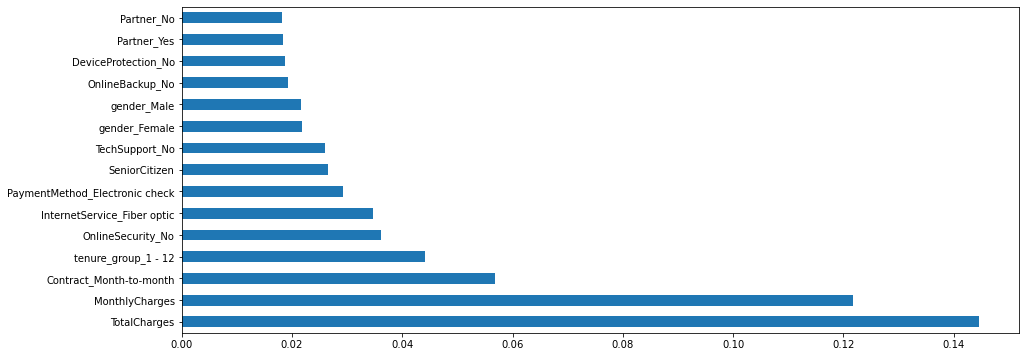

In [77]:
from sklearn.ensemble import ExtraTreesClassifier
selection=ExtraTreesClassifier()
selection.fit(x,y)
##use inbuilt class feature_importances of tree based classifiers
print(selection.feature_importances_)
# for plotting
plt.figure(figsize=(15,6))
feat_importances=pd.Series(selection.feature_importances_,index=x.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

#### Obs: We could see Total Charges,Monthly Charges and Contract Month to Month are top 3 most important features to predict the churn in our dataset.

# Model Buidling

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc
from imblearn.combine import SMOTEENN

In [79]:
## Over sampling our data
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [80]:
def max_accuracy_score(clf,x,y):
    max_accuracy=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(X_resampled1,y_resampled1,test_size=.20,random_state=i,stratify=y_resampled1) 
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        accuracy_check=accuracy_score(y_test,pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max accuracy score corresponding to',final_r,'is',max_accuracy*100)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean()*100)
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std()*100)
    print('\n')
    print('F1 score',f1_score(y_test,pred)*100)
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('\n')
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report',classification_report(y_test,pred))
    print('\n')
    print('Roc_auc Score',roc_auc_score(y_test,pred)*100)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")
    return final_r

# LogisticRegression()

max accuracy score corresponding to 53 is 94.85232067510549


cross validation score 80.07968256016518


Standard Deviation 0.7595047593368885


F1 score 93.72128637059726


Training accuracy 93.28547297297297


Test Accuracy 93.08016877637131


Confusion Matrix [[491  44]
 [ 38 612]]


Classification Report               precision    recall  f1-score   support

           0       0.93      0.92      0.92       535
           1       0.93      0.94      0.94       650

    accuracy                           0.93      1185
   macro avg       0.93      0.93      0.93      1185
weighted avg       0.93      0.93      0.93      1185



Roc_auc Score 92.9647735442128





53

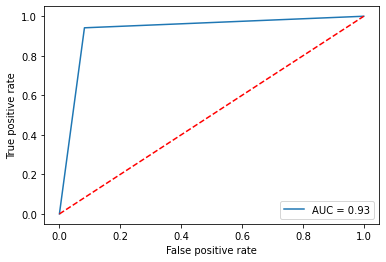

In [81]:
lr=LogisticRegression()
max_accuracy_score(lr,x,y)

# Decision Tree

max accuracy score corresponding to 72 is 95.61181434599156


cross validation score 72.35512170140008


Standard Deviation 1.2641828539743893


F1 score 94.68892261001517


Training accuracy 100.0


Test Accuracy 94.09282700421942


Confusion Matrix [[491  44]
 [ 26 624]]


Classification Report               precision    recall  f1-score   support

           0       0.95      0.92      0.93       535
           1       0.93      0.96      0.95       650

    accuracy                           0.94      1185
   macro avg       0.94      0.94      0.94      1185
weighted avg       0.94      0.94      0.94      1185



Roc_auc Score 93.88785046728972





72

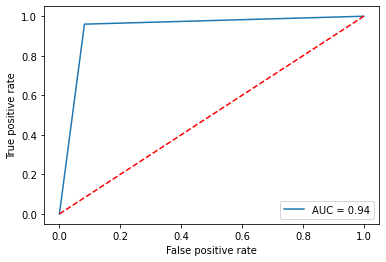

In [82]:
dt=DecisionTreeClassifier()
max_accuracy_score(dt,x,y)

# KNN

max accuracy score corresponding to 68 is 97.13080168776371


cross validation score 76.03291946254596


Standard Deviation 0.791836960811651


F1 score 96.51515151515152


Training accuracy 97.1706081081081


Test Accuracy 96.11814345991561


Confusion Matrix [[502  33]
 [ 13 637]]


Classification Report               precision    recall  f1-score   support

           0       0.97      0.94      0.96       535
           1       0.95      0.98      0.97       650

    accuracy                           0.96      1185
   macro avg       0.96      0.96      0.96      1185
weighted avg       0.96      0.96      0.96      1185



Roc_auc Score 95.9158878504673





68

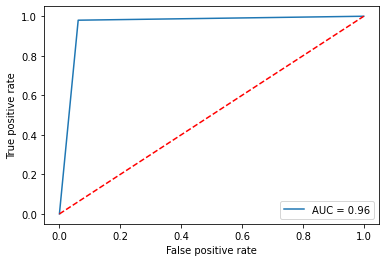

In [83]:
knn=KNeighborsClassifier()
max_accuracy_score(knn,x,y)

# Naive Bayes

max accuracy score corresponding to 60 is 91.89873417721519


cross validation score 70.26824311245888


Standard Deviation 0.6263737736563249


F1 score 90.79847908745246


Training accuracy 90.2660472972973


Test Accuracy 89.78902953586498


Confusion Matrix [[467  68]
 [ 53 597]]


Classification Report               precision    recall  f1-score   support

           0       0.90      0.87      0.89       535
           1       0.90      0.92      0.91       650

    accuracy                           0.90      1185
   macro avg       0.90      0.90      0.90      1185
weighted avg       0.90      0.90      0.90      1185



Roc_auc Score 89.56793673616103





60

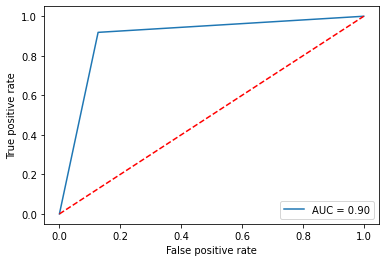

In [84]:
gnb=GaussianNB()
max_accuracy_score(gnb,x,y)

# Random forest

max accuracy score corresponding to 85 is 96.87763713080169


cross validation score 78.41833545712628


Standard Deviation 1.4990483239356829


F1 score 95.77677224736047


Training accuracy 100.0


Test Accuracy 95.27426160337554


Confusion Matrix [[494  41]
 [ 15 635]]


Classification Report               precision    recall  f1-score   support

           0       0.97      0.92      0.95       535
           1       0.94      0.98      0.96       650

    accuracy                           0.95      1185
   macro avg       0.95      0.95      0.95      1185
weighted avg       0.95      0.95      0.95      1185



Roc_auc Score 95.01437814521925





85

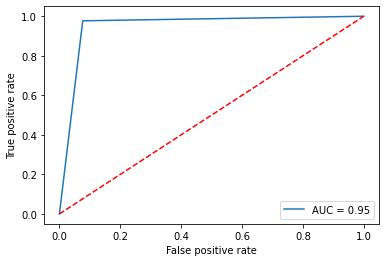

In [85]:
rf=RandomForestClassifier()
max_accuracy_score(rf,x,y)

# Ada Boost

max accuracy score corresponding to 53 is 95.9493670886076


cross validation score 80.37776630750372


Standard Deviation 1.0294022509605771


F1 score 95.55388093443857


Training accuracy 95.14358108108108


Test Accuracy 95.0210970464135


Confusion Matrix [[492  43]
 [ 16 634]]


Classification Report               precision    recall  f1-score   support

           0       0.97      0.92      0.94       535
           1       0.94      0.98      0.96       650

    accuracy                           0.95      1185
   macro avg       0.95      0.95      0.95      1185
weighted avg       0.95      0.95      0.95      1185



Roc_auc Score 94.75053918044571





53

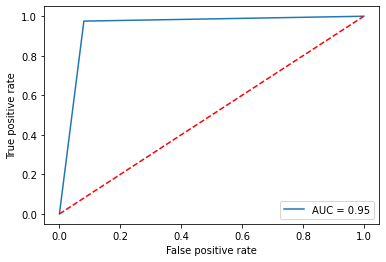

In [86]:
Adb=AdaBoostClassifier()
max_accuracy_score(Adb,x,y)

# Gardient Boost

max accuracy score corresponding to 56 is 96.87763713080169


cross validation score 80.53406671398153


Standard Deviation 1.104791466109331


F1 score 96.57794676806083


Training accuracy 96.64273648648648


Test Accuracy 96.20253164556962


Confusion Matrix [[505  30]
 [ 15 635]]


Classification Report               precision    recall  f1-score   support

           0       0.97      0.94      0.96       535
           1       0.95      0.98      0.97       650

    accuracy                           0.96      1185
   macro avg       0.96      0.96      0.96      1185
weighted avg       0.96      0.96      0.96      1185



Roc_auc Score 96.04241552839684





56

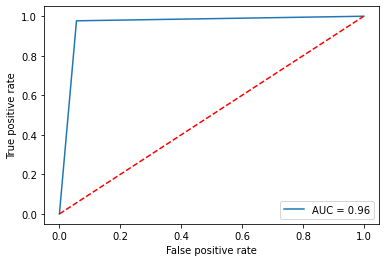

In [87]:
gb=GradientBoostingClassifier()
max_accuracy_score(gb,x,y)

#### Obs: Logistic Regression is our best model among all because it givers us a very good accuracy & f 1 score with least difference with cross validation score so we will Logistic regression as our best model

# Hyperparameter Tuning

In [90]:
X_resampled, y_resampled = sm.fit_resample(x,y)
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,random_state=78,test_size=.20,stratify=y_resampled)
lg_1=LogisticRegression()
param={'penalty':['l2','l1','elasticnet'],'C':[.001,.01,.1,1,10],'solver':['newton-cg','lbfgs','liblinear','sag','saga'],'max_iter':[50,100,200]}

grid=GridSearchCV(estimator=lg_1,param_grid=param,scoring='accuracy',n_jobs=-1)

grid.fit(x_train,y_train)

grid.best_params_

{'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [93]:
lg_final=LogisticRegression(C=10,max_iter=100,penalty='l1',solver='liblinear')
lg_final.fit(x_train,y_train)
pred=lg_final.predict(x_test)
print('Final Accuracy_score :',accuracy_score(pred,y_test)*100)
print('\n')
print('Final f_1 score :',f1_score(pred,y_test)*100)
print('\n')
print('Final roc_auc score :',roc_auc_score(pred,y_test)*100)
print('\n')
print('Final classification Report :',classification_report(pred,y_test))
print('\n')
print('Final confusion Matrix :',confusion_matrix(pred,y_test))

Final Accuracy_score : 94.31721798134012


Final f_1 score : 94.81022463206816


Final roc_auc score : 94.30320150659135


Final classification Report :               precision    recall  f1-score   support

           0       0.93      0.94      0.94       531
           1       0.95      0.94      0.95       648

    accuracy                           0.94      1179
   macro avg       0.94      0.94      0.94      1179
weighted avg       0.94      0.94      0.94      1179



Final confusion Matrix : [[500  31]
 [ 36 612]]


# Saving Model

In [94]:
import joblib
joblib.dump(lr,'lr_Customerchurn_file.obj')

['lr_Customerchurn_file.obj']

# Loading Model

In [95]:
lr_from_joblib=joblib.load('lr_Customerchurn_file.obj')
lr_from_joblib.predict(x_test)

array([0, 0, 1, ..., 0, 0, 0])

## Completed;